In [1]:
from astropy.io import fits
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import convolve, Gaussian1DKernel

# zall-pix-fuji.fits
Index of /public/edr/spectro/redux/fuji/zcatalog/

Este catalogo contiene la clasificación de tipos espectrales, surveys, Healpix, Chi2, RA, DEC

In [2]:
archivo_fits = fits.open('zall-pix-fuji.fits') #open file

In [3]:
archivo_fits.info() #resume el contenido de la tabla

Filename: zall-pix-fuji.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  ZCATALOG      1 BinTableHDU    333   2847435R x 130C   [K, 7A, 6A, J, J, D, D, K, D, 10D, K, 6A, 20A, K, D, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, L, K, L]   


In [23]:
archivo_fits[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  746 / length of dimension 1                          
NAXIS2  =              2847435 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  130 / number of table fields                         
TTYPE1  = 'TARGETID'                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'SURVEY  '                                                            
TFORM2  = '7A      '                                                            
TTYPE3  = 'PROGRAM '        

In [22]:
Table.read(archivo_fits, hdu=1) 

TARGETID,SURVEY,PROGRAM,HEALPIX,SPGRPVAL,Z,ZERR,ZWARN,CHI2,COEFF,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKNAME,BRICKID,BRICK_OBJID,MORPHTYPE,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,MASKBITS,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,CMX_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,SCND_TARGET,SV1_DESI_TARGET,SV1_BGS_TARGET,SV1_MWS_TARGET,SV1_SCND_TARGET,SV2_DESI_TARGET,SV2_BGS_TARGET,SV2_MWS_TARGET,SV2_SCND_TARGET,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,TSNR2_GPBDARK_B,TSNR2_ELG_B,TSNR2_GPBBRIGHT_B,TSNR2_LYA_B,TSNR2_BGS_B,TSNR2_GPBBACKUP_B,TSNR2_QSO_B,TSNR2_LRG_B,TSNR2_GPBDARK_R,TSNR2_ELG_R,TSNR2_GPBBRIGHT_R,TSNR2_LYA_R,TSNR2_BGS_R,TSNR2_GPBBACKUP_R,TSNR2_QSO_R,TSNR2_LRG_R,TSNR2_GPBDARK_Z,TSNR2_ELG_Z,TSNR2_GPBBRIGHT_Z,TSNR2_LYA_Z,TSNR2_BGS_Z,TSNR2_GPBBACKUP_Z,TSNR2_QSO_Z,TSNR2_LRG_Z,TSNR2_GPBDARK,TSNR2_ELG,TSNR2_GPBBRIGHT,TSNR2_LYA,TSNR2_BGS,TSNR2_GPBBACKUP,TSNR2_QSO,TSNR2_LRG,SV_NSPEC,SV_PRIMARY,ZCAT_NSPEC,ZCAT_PRIMARY
int64,str7,str6,int32,int32,float64,float64,int64,float64,float64[10],int64,str6,str20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,str3,float64,int32,int16,str8,int32,int32,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,str1,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,bool,int64,bool
616089230757593610,cmx,other,2152,2152,1.0791710884059862,8.043609933906356e-05,5,8196.955931693316,-31.270945382111947 .. -4.304250468199833,7928,GALAXY,--,10,8.043657064437866,0,23.914121939862518,29.974787585945496,0.0,0.0,0.0,4294967296,4,SKY,0.8476382465505894,63,9010,0240p300,495765,522,--,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-0.003990191,0.026369713,0.0027650434,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,--,0.0,0.0,0.0,0.0,--,-1,-1,4294967296,4294967296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.914121939862518,29.974787585945496,4,3600.0,1,1,-0.004,0.008336666,-0.00275,0.009987492,23.914140396147115,0.14040637,29.974777243955057,0.12941206,0.793052,639.917,0.3878204,121.14421,339.00644,2058.3599,832.6921,10.254479,3.4988468,43286.7,93.85132,7782.0195,0.16086136,8970.089,47104.805,28.528677,136.52605,5.594912e-05,293.99265,1.0618171e-05,0.0,13069.495,7.403538e-05,60.08052,135.6212,43926.617,388.23178,7903.1636,339.1673,24097.945,47937.496,98.86368,275.6461,0,False,1,True
39628473202904408,cmx,other,2152,2152,0.18041222201570103,8.931818686229672e-06,0,12949.879635035992,-109.46447587943996 .. 12.118995244141198,7926,GALAXY,--,10,8801.990980923176,0,24.04010479193436,29.813362596941825,0.0,0.0,2020.9597,72057594037929216,1,TGT,0.6306843567905966,7,9010,--,494513,3416,DEV,0.047077972,6.2664,17.88001,40.539513,59.783627,50.919693,533.2463,113.88678,26.52623,-1.0,-1.0,2.5057633,7.149731,16.210651,2.5057633,7.149731,16.210651,0,4.0,0.96060556,-0.2916907,-0.14283308,0,--,0.0,0.0,0.0,0.0,S,3200,1,7205759403792

In [16]:
archivo_fits[1].data['TARGETID'] #Tenemos el np.ndarray de los TARGETID

array([616089230757593610,  39628473202904408,  39628473202902554, ...,
        39628438587313503,  39628438587315309,           -1193332],
      dtype=int64)

Podemos obtener la clasificacion espectral de los espectros que utilizamos en la 'Descripción general de catalogos', utilizando sus respectivos 'TARGETID' y buscandolos en el 'zall-pix-fuji.fits'. Asi:

In [18]:
target=[2305843019716235906,616093919289017142,2305843019716232322,616093919289017218,2305843019716236594,2305843019716235023
       ,-3745505, 616093919289017038,2305843019716233633, 39633166985596095, 39633166985594891]

clasificacion={}

for i in range(len(archivo_fits[1].data['TARGETID'])):
    if archivo_fits[1].data['TARGETID'][i] in target:
        clasificacion[archivo_fits[1].data['TARGETID'][i]]= archivo_fits[1].data['SPECTYPE'][i]
    if len(clasificacion)==len(target):
        break    
print("listo")

listo


In [42]:
clasificacion

{2305843019716233633: 'STAR',
 616093919289017038: 'GALAXY',
 -3745505: 'STAR',
 2305843019716235906: 'STAR',
 2305843019716236594: 'STAR',
 616093919289017218: 'GALAXY',
 2305843019716232322: 'STAR',
 616093919289017142: 'GALAXY',
 2305843019716235023: 'STAR',
 39633166985594891: 'GALAXY',
 39633166985596095: 'GALAXY'}

# Ahora Contaremos por cada spectype, unicamente para SURVEY=sv3 y PROGRAM=dark, la cantidad de elementos

In [99]:
new_Table=Table.read(archivo_fits, hdu=1)[['TARGETID','SURVEY','PROGRAM','SPECTYPE']]#unicamente toma estas columnas de la original

In [100]:
new_Table.group_by(['SURVEY','SPECTYPE','PROGRAM']) #Organiza por grupos

TARGETID,SURVEY,PROGRAM,SPECTYPE
int64,str7,str6,str6
616089230757593610,cmx,other,GALAXY
39628473202904408,cmx,other,GALAXY
39628473202902554,cmx,other,GALAXY
616089225506325615,cmx,other,GALAXY
39628473202904338,cmx,other,GALAXY
39628473202902855,cmx,other,GALAXY
39628473202901945,cmx,other,GALAXY
39628478449979912,cmx,other,GALAXY
39628473202901028,cmx,other,GALAXY


In [101]:
new_Table.group_by(['SURVEY','SPECTYPE']).groups.keys #nos dice cuantos grupos hay por SURVEY+SPECTYPE

SURVEY,SPECTYPE
str7,str6
cmx,GALAXY
cmx,QSO
cmx,STAR
special,GALAXY
special,QSO
special,STAR
sv1,GALAXY
sv1,QSO
sv1,STAR


Creamos mascaras para seleccionar unicamente los valores deseados por cada parametro (SURVEY,PROGRAM,...)

In [102]:
mask=new_Table.group_by('SURVEY').groups.keys['SURVEY']=='sv3' #mascara para clasificación del SURVEY
just_sv3=new_Table.group_by('SURVEY').groups[mask] #aqui creamos una nueva tabla unicamente con el SURVEY==sv3

mask1=just_sv3.group_by('PROGRAM').groups.keys['PROGRAM']=='dark' #mascara para clasificación del PROGRAM
just_sv3_dark=just_sv3.group_by('PROGRAM').groups[mask1] #aqui creamos una nueva tabla unicamente con el SURVEY==sv3 y PROGRAM=='dark'

In [103]:
just_sv3_dark

TARGETID,SURVEY,PROGRAM,SPECTYPE
int64,str7,str6,str6
-2000468,sv3,dark,GALAXY
39632936152072720,sv3,dark,GALAXY
39632936152072816,sv3,dark,GALAXY
39632936147881012,sv3,dark,GALAXY
-2000502,sv3,dark,GALAXY
39632936152072857,sv3,dark,GALAXY
39632936147880205,sv3,dark,GALAXY
39632936147881180,sv3,dark,GALAXY
39632936152073654,sv3,dark,QSO


In [104]:
len(just_sv3_dark)

862947

Ahora, verificamos que no se repiten TARGETS para que al contar cada elemento por tipo espectral no contemos más de uan vez el mismo objeto.

In [105]:
just_sv3_dark.group_by(['TARGETID']).groups.keys

TARGETID
int64
-5819526
-5819518
-5819510
-5819492
-5819491
-5819472
-5819458
-5819454
-5819436


In [106]:
len(just_sv3_dark.group_by(['TARGETID']).groups.keys)

862947

# contamos para SPECTYPE utilizando una mascara adicional por cada uno


In [108]:
mask2=just_sv3_dark.group_by('SPECTYPE').groups.keys['SPECTYPE']=='GALAXY' #mascara para clasificación de Galaxias
just_sv3_dark_GALAXY=just_sv3_dark.group_by('SPECTYPE').groups[mask2] #aqui creamos una nueva tabla unicamente con el sv3, dark, GALAXY

mask3=just_sv3_dark.group_by('SPECTYPE').groups.keys['SPECTYPE']=='QSO' #mascara para clasificación de QSO's
just_sv3_dark_QSO=just_sv3_dark.group_by('SPECTYPE').groups[mask3] #aqui creamos una nueva tabla unicamente con el sv3, dark, QSO

mask4=just_sv3_dark.group_by('SPECTYPE').groups.keys['SPECTYPE']=='STAR' #mascara para clasificación de estrellas
just_sv3_dark_STAR=just_sv3_dark.group_by('SPECTYPE').groups[mask4] #aqui creamos una nueva tabla unicamente con el sv3, dark, STAR


Number_GALAXY=len(just_sv3_dark_GALAXY)
Number_QSO=len(just_sv3_dark_QSO)
Number_STAR=len(just_sv3_dark_STAR)

In [116]:
print('Number_GALAXY: '+str(Number_GALAXY))
print('Number_QSO: '+str(Number_QSO))
print('Number_STAR: '+str(Number_STAR))
print('total: '+str(Number_GALAXY+Number_QSO+Number_STAR))

Number_GALAXY: 650363
Number_QSO: 44996
Number_STAR: 167588
total: 862947


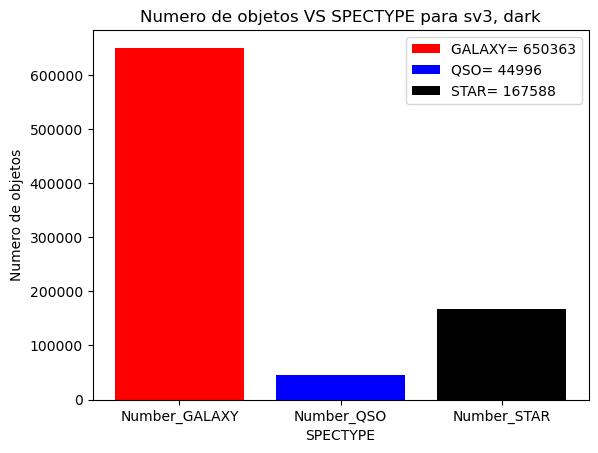

In [137]:
x0,x1,x2=['Number_GALAXY'],['Number_QSO'],['Number_STAR']
y0,y1,y2=[Number_GALAXY],[Number_QSO],[Number_STAR]

fig, ax = plt.subplots()
ax.set(title=r'Numero de objetos VS SPECTYPE para sv3, dark',
    ylabel='Numero de objetos', xlabel='SPECTYPE')
plt.bar(x0,y0, color='r', label='GALAXY= '+str(Number_GALAXY))
plt.bar(x1,y1, color='b', label='QSO= '+str(Number_QSO))
plt.bar(x2,y2, color='k', label='STAR= '+str(Number_STAR))
plt.legend(loc = "upper right")
plt.show()